<a href="https://colab.research.google.com/github/Sudecon5/Projects_New-/blob/main/Germany_GDP_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# German GDP Analysis Post Russian Ukraine War.

---


The Russian Ukraine invasion occured on 24th February, 2022. Germany had already been affected with a slow growth in the economy with difficulty in
switching to a green economy. The aim is to analysis whether the German economy had faced significant challenge in the labour market, also in GDP growth post the Russian-Ukraine War and the significant energy crisis that the war had brought in the Europe region

In [82]:
pip install quantstats

In [83]:
#import librariries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import os
import yfinance as yf
import quantstats as qs

In [67]:
df = pd.read_csv('/content/World_Data3.csv')

df.describe()


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,1.380000e+02,1.420000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.540000e+02,1.550000e+02,1.580000e+02,1.590000e+02,1.590000e+02,...,2.600000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.570000e+02,2.560000e+02,2.500000e+02,2.330000e+02
mean,7.200135e+10,7.344863e+10,7.705685e+10,8.355040e+10,9.212490e+10,9.456419e+10,1.008525e+11,1.049024e+11,1.122024e+11,1.240957e+11,...,2.518707e+12,2.387690e+12,2.419977e+12,2.590958e+12,2.758285e+12,2.800003e+12,2.731496e+12,3.143176e+12,3.344084e+12,3.731061e+12
std,2.105987e+11,2.198953e+11,2.346247e+11,2.533566e+11,2.772855e+11,2.930786e+11,3.170488e+11,3.349868e+11,3.616585e+11,3.985477e+11,...,8.611294e+12,8.178005e+12,8.315937e+12,8.849398e+12,9.421158e+12,9.557685e+12,9.351887e+12,1.068045e+13,1.115828e+13,1.201231e+13
min,1.201202e+07,1.159202e+07,9.122751e+06,1.084010e+07,1.271247e+07,1.359393e+07,1.446908e+07,1.583511e+07,1.460000e+07,1.585000e+07,...,3.876098e+07,3.681194e+07,4.162906e+07,4.527660e+07,4.801526e+07,5.412320e+07,5.174659e+07,6.019641e+07,5.906598e+07,6.228031e+07
25%,4.640236e+08,4.869202e+08,5.185977e+08,5.150864e+08,5.415796e+08,5.469225e+08,5.941499e+08,5.190310e+08,5.388035e+08,5.640739e+08,...,9.034786e+09,8.752203e+09,8.620785e+09,9.193745e+09,9.907493e+09,1.002836e+10,9.505065e+09,1.001319e+10,1.313119e+10,1.678630e+10
50%,2.742183e+09,2.630463e+09,2.597113e+09,3.079781e+09,3.184168e+09,2.995997e+09,3.143518e+09,3.313946e+09,3.852147e+09,4.380987e+09,...,5.013450e+10,4.906176e+10,4.806565e+10,5.277001e+10,5.504609e+10,5.768290e+10,5.373453e+10,6.246662e+10,7.059355e+10,8.575501e+10
75%,3.047209e+10,3.063881e+10,3.000765e+10,3.145128e+10,3.308114e+10,3.076614e+10,3.334390e+10,3.305382e+10,3.522991e+10,3.883655e+10,...,5.477500e+11,5.020000e+11,5.060000e+11,5.370000e+11,5.520000e+11,5.420000e+11,5.470000e+11,6.502500e+11,7.860000e+11,1.110000e+12
max,1.360000e+12,1.440000e+12,1.540000e+12,1.660000e+12,1.830000e+12,1.990000e+12,2.150000e+12,2.290000e+12,2.480000e+12,2.740000e+12,...,7.990000e+13,7.540000e+13,7.660000e+13,8.160000e+13,8.670000e+13,8.790000e+13,8.560000e+13,9.750000e+13,1.010000e+14,1.050000e+14


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            138 non-null    float64
 5   1961            142 non-null    float64
 6   1962            144 non-null    float64
 7   1963            144 non-null    float64
 8   1964            144 non-null    float64
 9   1965            154 non-null    float64
 10  1966            155 non-null    float64
 11  1967            158 non-null    float64
 12  1968            159 non-null    float64
 13  1969            159 non-null    float64
 14  1970            181 non-null    float64
 15  1971            182 non-null    float64
 16  1972            182 non-null    float64
 17  1973            182 non-null    flo

In [85]:
df.isnull().sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
1960,128
...,...
2019,8
2020,9
2021,10
2022,16


In [86]:
df['Country Name'].describe()

,Country Name
count,266
unique,266
top,Aruba
freq,1


# Analysis Of Germany

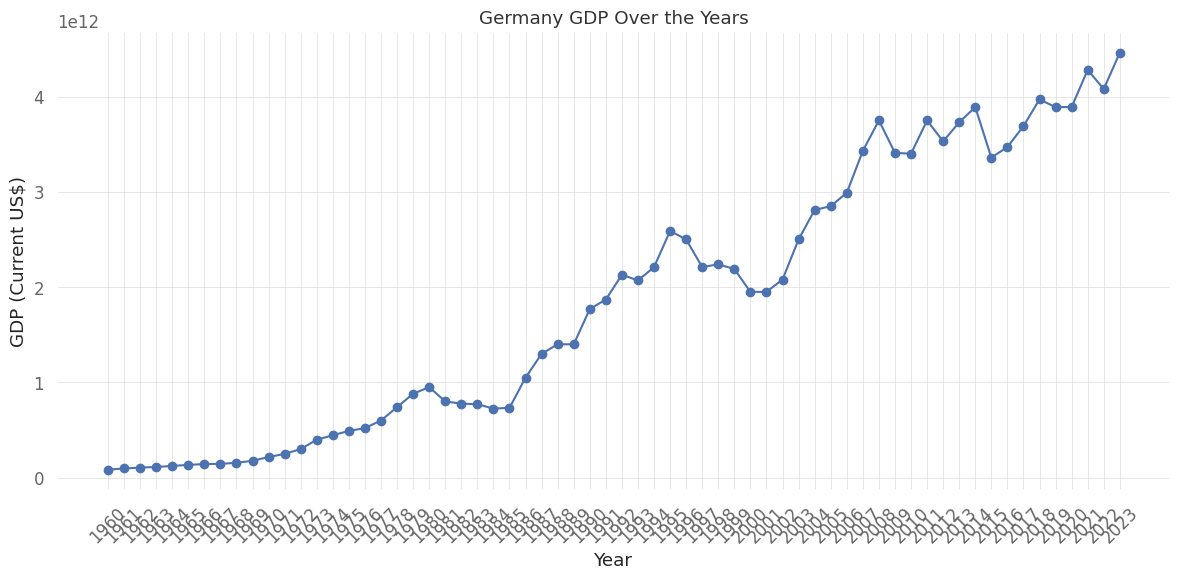

In [87]:
# Reshape the DataFrame
df_melted = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name='Year', value_name='GDP')

# Filter for Germany and drop rows with missing values
germany_data = df_melted[df_melted['Country Name'] == 'Germany'].dropna(subset=['GDP'])

# Convert the Year column to integers
germany_data['Year'] = germany_data['Year'].astype(int)

# Sort by Year
germany_data.sort_values('Year', inplace=True)

# Plot the GDP over the years
plt.figure(figsize=(12, 6))
plt.plot(germany_data['Year'], germany_data['GDP'], marker='o', linestyle='-')
plt.title('Germany GDP Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP (Current US$)')
plt.xticks(germany_data['Year'], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


German GDP Post Russia-Ukraine War












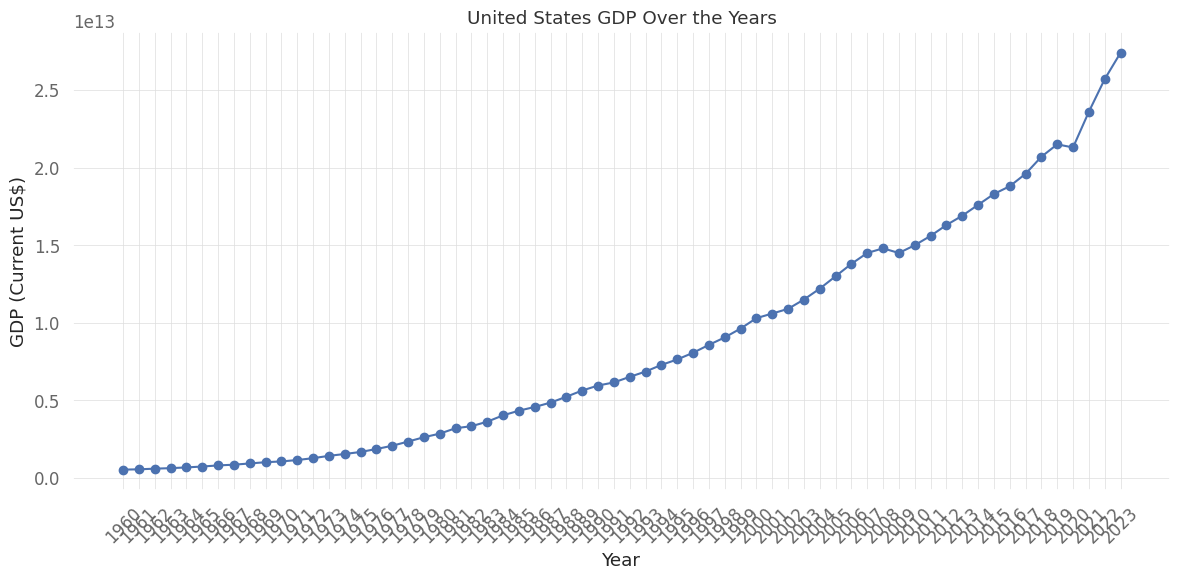

In [88]:
# Filter for Germany and drop rows with missing values
USA_data = df_melted[df_melted['Country Name'] == 'United States'].dropna(subset=['GDP'])

# Convert the Year column to integers
USA_data['Year'] = USA_data['Year'].astype(int)

# Sort by Year
USA_data.sort_values('Year', inplace=True)

# Plot the GDP over the years
plt.figure(figsize=(12, 6))
plt.plot(USA_data['Year'], USA_data['GDP'], marker='o', linestyle='-')
plt.title('United States GDP Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP (Current US$)')
plt.xticks(USA_data['Year'], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Sample Period

In [106]:
import yfinance as yf

# Define the stock symbols for Allianz, Mercedes-Benz, and Siemens
symbols = {
    'Allianz': 'ALV.DE',
    'Mercendes Benz': 'MBG.DE',
    'Siemens': 'SIE.DE'
}

# Dictionary to store the downloaded data
stock_data = {}

# Download the data for each company
for company, symbol in symbols.items():
    data = yf.download(symbol, start="2018-12-01", end="2022-04-01")
    stock_data[company] = data

# Print the data in the desired format
for company, data in stock_data.items():
    print(f"\n{company}:")
    print(data.head())  # Print the first few rows for brevity, change as needed



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Allianz:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-12-03  190.699997  191.039993  189.000000  189.619995  139.566605   
2018-12-04  189.020004  189.619995  188.179993  188.380005  138.653946   
2018-12-05  186.000000  186.240005  183.059998  184.300003  135.650909   
2018-12-06  182.119995  182.600006  174.080002  176.020004  129.556580   
2018-12-07  177.580002  178.740005  175.380005  175.380005  129.085526   

             Volume  
Date                 
2018-12-03  1261642  
2018-12-04   917373  
2018-12-05  1288772  
2018-12-06  2446251  
2018-12-07  1297765  

Mercendes Benz:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2018-12-03  43.417217  44.490173  42.968075  43.209278  30.131172   9224854
2018-12-04  42.793407  42.901535  41.961658  41.961658  29.261166   4442

In [107]:
#Converting Timezones
# Remove any timezone information if present
Allianz.index = Allianz.index.tz_localize(None)
Mercendes.index = Mercendes.index.tz_localize(None)
Siemens.index = Siemens.index.tz_localize(None)



In [108]:
# Calculate the Daily Returns for 3 companies
Allianz =qs.utils.download_returns('ALV.DE')
Allianz =Allianz.loc['2021-12-01': '2022-04-01']

Mercendes =qs.utils.download_returns('MBG.DE')
Mercendes =Mercendes.loc['2021-12-01': '2022-04-01']

Siemens =qs.utils.download_returns('SIE.DE')
Siemens =Siemens.loc['2021-12-01': '2022-04-01']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed



Tata Motors Daily Reurns Plot:



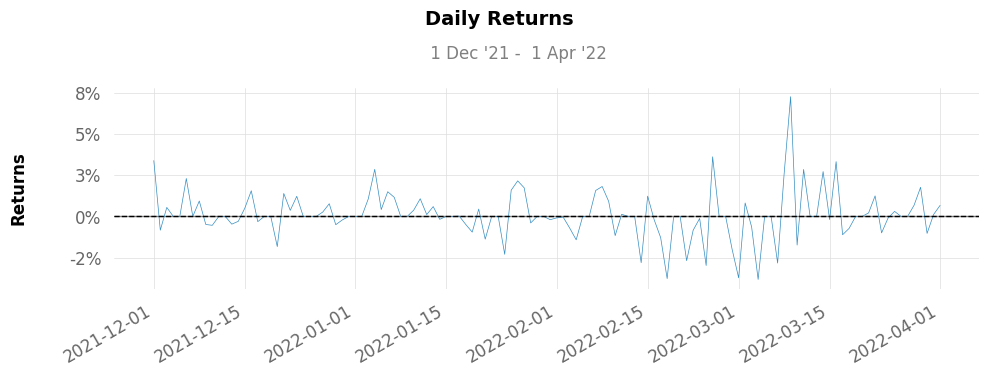






Maruti Suzuki Daily Returns Plot:



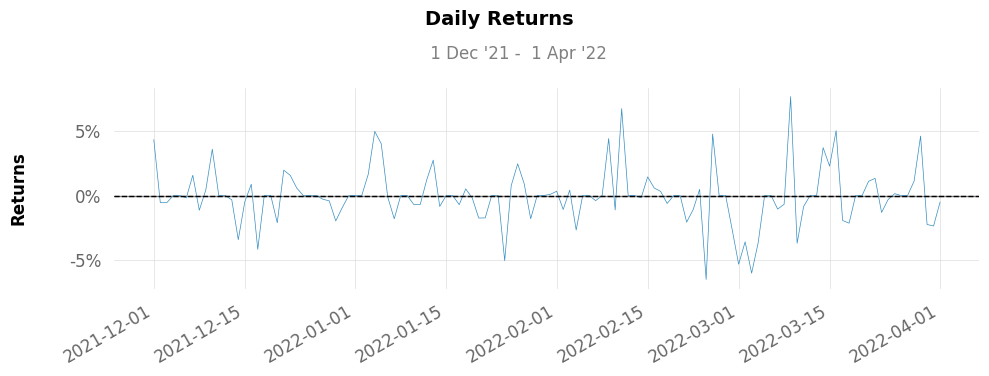






Mahindra & Mahindra Daily Returns Plot:



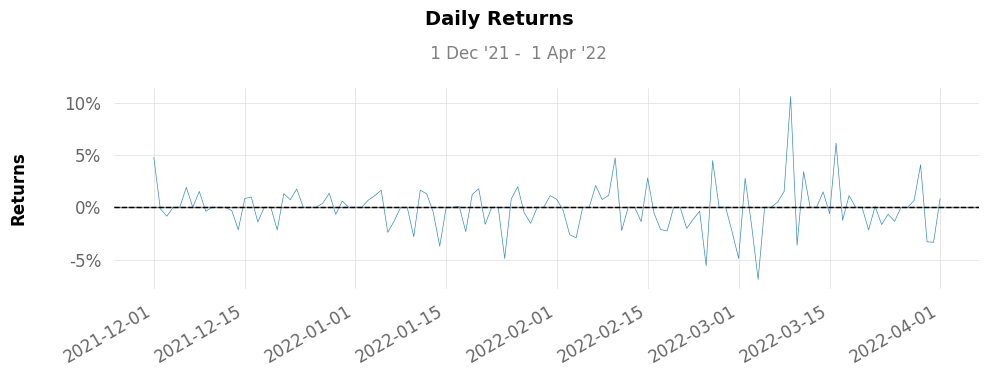

In [109]:
sp500_symbol = '^GSPC'

# Download the historical data for S&P 500
sp500_data = yf.download(sp500_symbol, start="2021-12-01", end="2022-04-01")
print('\nTata Motors Daily Reurns Plot:\n')
qs.plots.daily_returns(Allianz, sp500_data)
print('\n')
print('\n')
print('\nMaruti Suzuki Daily Returns Plot:\n')
qs.plots.daily_returns(Mercendes, sp500_data)
print('\n')
print('\n')
print('\nMahindra & Mahindra Daily Returns Plot:\n')
qs.plots.daily_returns(Siemens, sp500_data)

In [110]:
Allianz =qs.utils.download_returns('ALV.DE')
Allianz =Allianz.loc['2018-12-01': '2022-12-01']

Mercendes =qs.utils.download_returns('MBG.DE')
Mercendes =Mercendes.loc['2018-12-01': '2022-12-01']

Siemens =qs.utils.download_returns('SIE.DE')
Siemens =Siemens.loc['2018-12-01': '2022-12-01']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [111]:
#Converting Timezones
# Remove any timezone information if present
Allianz.index = Allianz.index.tz_localize(None)
Mercendes.index = Mercendes.index.tz_localize(None)
Siemens.index = Siemens.index.tz_localize(None)


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: RuntimeWarning:

overflow encountered in accumulate

/usr/local/lib/python3.10/dist-packages/quantstats/utils.py:269: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.




Allianz Cumulative Returns Plot:



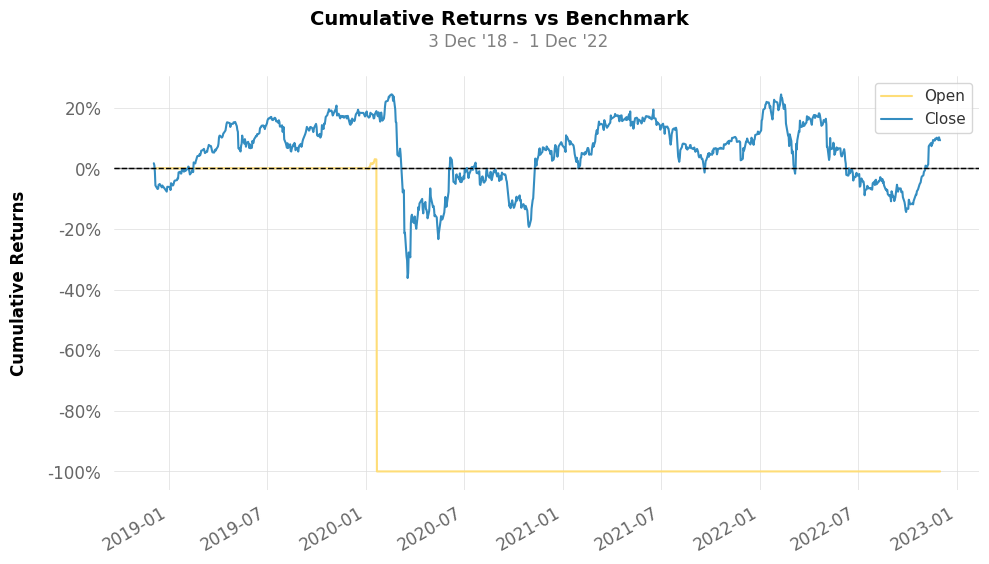

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: RuntimeWarning:

overflow encountered in accumulate

/usr/local/lib/python3.10/dist-packages/quantstats/utils.py:269: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.








Mercendes Benz Cumulative Returns Plot:



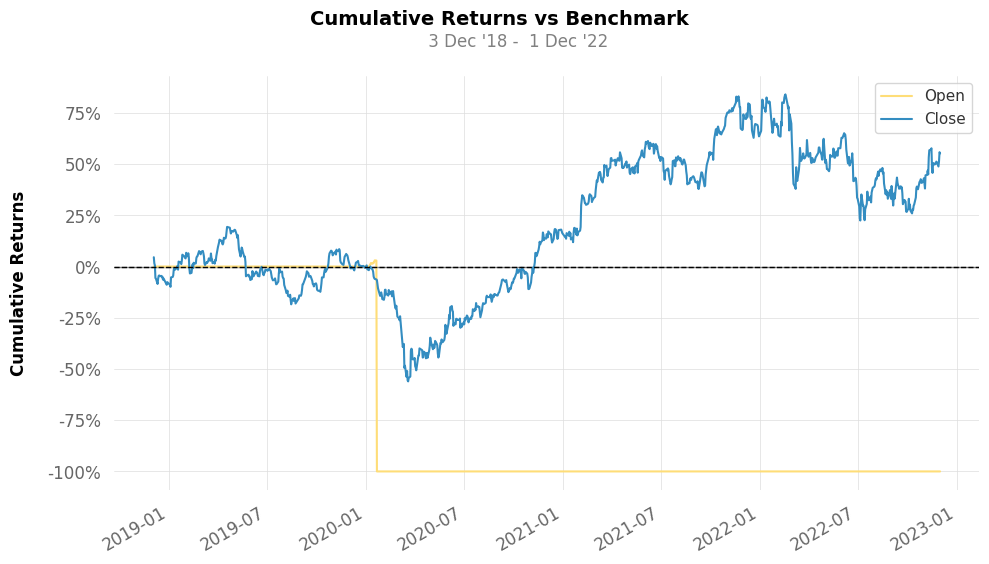

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: RuntimeWarning:

overflow encountered in accumulate

/usr/local/lib/python3.10/dist-packages/quantstats/utils.py:269: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.








Siemens Cumulative Returns Plot:



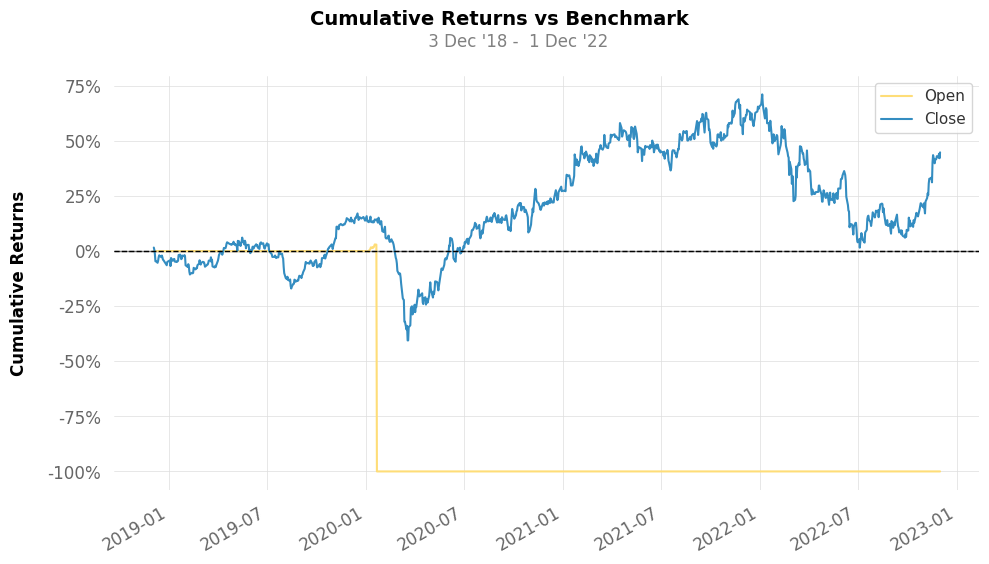

In [112]:
# Download S&P500 benchmark data
sp500_symbol = '^GSPC'
sp500_data = yf.download(sp500_symbol, start="2020-01-01", end="2022-12-01")
print('\nAllianz Cumulative Returns Plot:\n')
qs.plots.returns(Allianz, sp500_data)
print('\n')
print('\n')
print('\nMercendes Benz Cumulative Returns Plot:\n')
qs.plots.returns(Mercendes, sp500_data)
print('\n')
print('\n')
print('\nSiemens Cumulative Returns Plot:\n')
qs.plots.returns(Siemens, sp500_data)

In [123]:
# Define the stock symbols for AIG, Tesla, and General Electric
symbols = {
    'AIG': 'AIG',
    'Tesla': 'TSLA',
    'General Electric': 'GE'
}

# Dictionary to store the downloaded data
stock_data = {}

# Download the data for each company
for company, symbol in symbols.items():
    data = yf.download(symbol, start="2018-12-01", end="2022-04-01")
    stock_data[company] = data

    # Save each dataset as a CSV file
    file_name = f"{company}_stock_data.csv"
    data.to_csv(file_name)
    print(f"Data for {company} saved to {file_name}")

# Print the first few rows of the data for each company
for company, data in stock_data.items():
    print(f"\n{company}:")
    print(data.head())  # Print the first few rows for brevity



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data for AIG saved to AIG_stock_data.csv
Data for Tesla saved to Tesla_stock_data.csv
Data for General Electric saved to General Electric_stock_data.csv

AIG:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2018-12-03  43.840000  44.070000  42.900002  43.180000  36.680637  18618900
2018-12-04  43.060001  43.459999  40.700001  40.770000  34.633385   9380100
2018-12-06  39.959999  40.150002  38.500000  39.410000  33.478085  14400100
2018-12-07  39.259998  40.020000  37.830002  37.900002  32.195374   9247900
2018-12-10  37.599998  37.700001  36.160000  37.509998  31.864079  12287500

Tesla:
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-12-03  24.000000  24.400000  23.466667  23.899332  23.899332  124597500
2018-12-04  23.736668  24.578667  23.466667  23.980000  23.980000  126

In [124]:
# Remove any timezone information if present for each company
for company, data in stock_data.items():
    stock_data[company].index = stock_data[company].index.tz_localize(None)

# Now you can access the timezone-free data
for company, data in stock_data.items():
    print(f"\n{company} timezone-free data:")
    print(data.head())  # Print the first few rows for each company




AIG timezone-free data:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2018-12-03  43.840000  44.070000  42.900002  43.180000  36.680637  18618900
2018-12-04  43.060001  43.459999  40.700001  40.770000  34.633385   9380100
2018-12-06  39.959999  40.150002  38.500000  39.410000  33.478085  14400100
2018-12-07  39.259998  40.020000  37.830002  37.900002  32.195374   9247900
2018-12-10  37.599998  37.700001  36.160000  37.509998  31.864079  12287500

Tesla timezone-free data:
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-12-03  24.000000  24.400000  23.466667  23.899332  23.899332  124597500
2018-12-04  23.736668  24.578667  23.466667  23.980000  23.980000  126928500
2018-12-06  23.733999  24.492001  23.384001  24.204000  24.204000  117637500
2018-12-07  24.600000  25.29933

In [128]:
# Calculate the Daily Returns for 3 companies
AIG =qs.utils.download_returns('AIG')
AIG =AIG.loc['2021-12-01': '2022-04-01']

Tesla =qs.utils.download_returns('TSLA')
Tesla =Tesla.loc['2021-12-01': '2022-04-01']

General_Electric =qs.utils.download_returns('GE')
General_Electric =General_Electric.loc['2021-12-01': '2022-04-01']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed



AIG Daily Returns Plot:



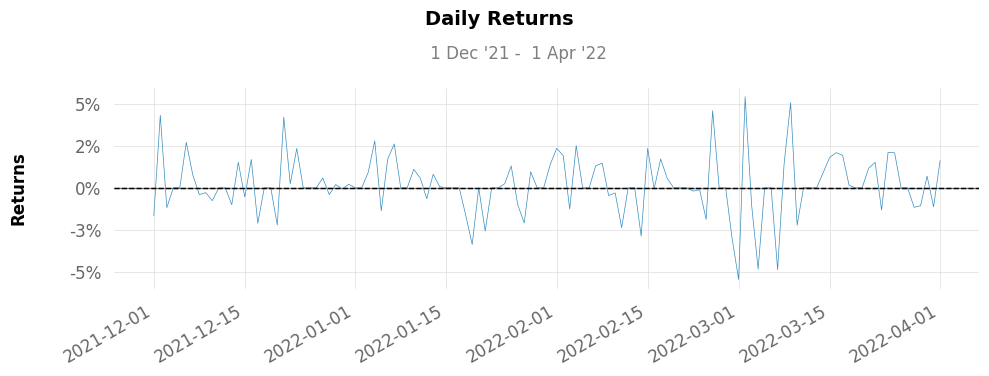






Tesla Daily Returns Plot:



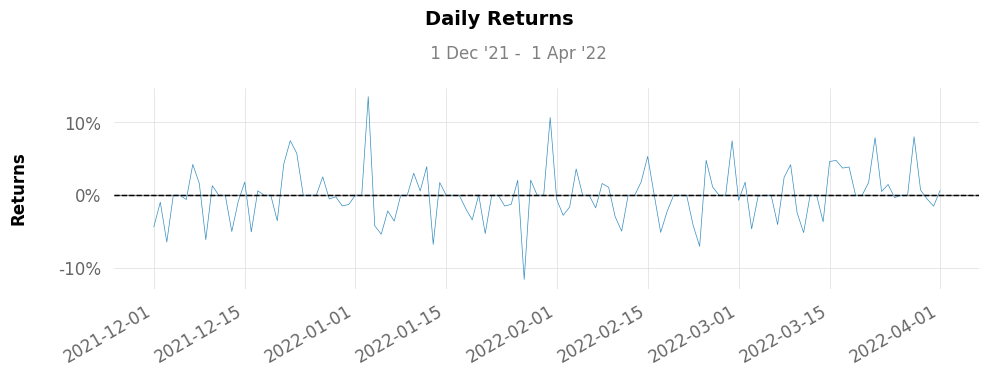






General Electric Plot:



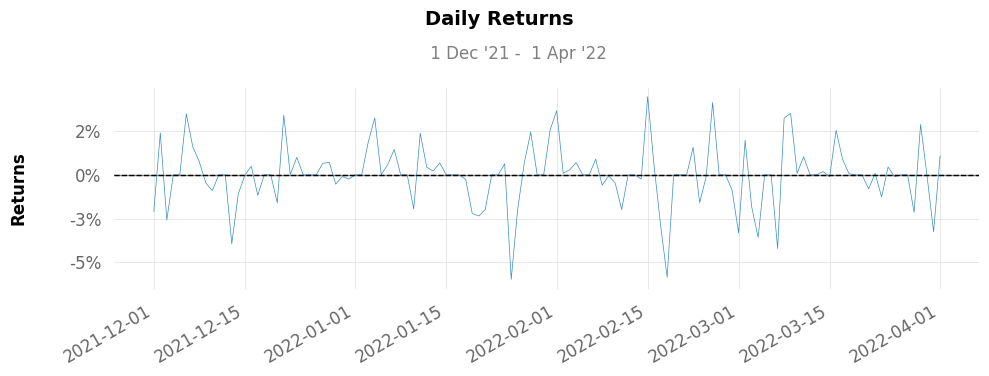

In [130]:
sp500_symbol = '^GSPC'

# Download the historical data for S&P 500
sp500_data = yf.download(sp500_symbol, start="2021-12-01", end="2022-04-01")
print('\nAIG Daily Returns Plot:\n')
qs.plots.daily_returns(AIG, sp500_data)
print('\n')
print('\n')
print('\nTesla Daily Returns Plot:\n')
qs.plots.daily_returns(Tesla, sp500_data)
print('\n')
print('\n')
print('\nGeneral Electric Plot:\n')
qs.plots.daily_returns(General_Electric, sp500_data)